In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
from scipy import stats
import datetime as dt

In [2]:
volc = np.genfromtxt('nature14565-s6_sigl2015.csv', delimiter=",", dtype=float)
data_kobb_2003 = np.genfromtxt('Ocn-Palmyra.Cobb.2003_v1.txt', delimiter=",", dtype=float) # nino3 reconstruction

In [3]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
# .04 corresponds to January 15 as 1/2*1/12 = 0.04, and then February 15 would be 1/24 + 1/12
# Series 1 1886.13 - 1998.37
# Series 2 1635.04 - 1703.38
# Series 3 1317.21 - 1464.63
# Series 4 1149.13 - 1220.13
# Series 5 928.13  - 961.04

s1_end_idx = np.asarray(np.where(data_kobb_2003[:,0] == 1886.13))[0,0]
s1_start_idx = np.asarray(np.where(data_kobb_2003[:,0] == 1998.37))[0,0]
s2_end_idx = np.asarray(np.where(data_kobb_2003[:,0] == 1635.04))[0,0]
s2_start_idx = np.asarray(np.where(data_kobb_2003[:,0] == 1703.38))[0,0]
s3_end_idx = np.asarray(np.where(data_kobb_2003[:,0] == 1317.21))[0,0]
s3_start_idx = np.asarray(np.where(data_kobb_2003[:,0] == 1464.63))[0,0]
s4_end_idx = np.asarray(np.where(data_kobb_2003[:,0] == 1149.13))[0,0]
s4_start_idx = np.asarray(np.where(data_kobb_2003[:,0] == 1220.13))[0,0]
s5_end_idx = np.asarray(np.where(data_kobb_2003[:,0] == 928.13))[0,0]
s5_start_idx = np.asarray(np.where(data_kobb_2003[:,0] == 961.04))[0,0]

s1_yy = np.flip(data_kobb_2003[s1_start_idx:s1_end_idx+1,0])
s1_data_kobb_2003 = np.flip(data_kobb_2003[s1_start_idx:s1_end_idx+1,1])

s2_yy = np.flip(data_kobb_2003[s2_start_idx:s2_end_idx+1,0])
s2_data_kobb_2003 = np.flip(data_kobb_2003[s2_start_idx:s2_end_idx+1,1])

s3_yy = np.flip(data_kobb_2003[s3_start_idx:s3_end_idx+1,0])
s3_data_kobb_2003 = np.flip(data_kobb_2003[s3_start_idx:s3_end_idx+1,1])

s4_yy = np.flip(data_kobb_2003[s4_start_idx:s4_end_idx+1,0])
s4_data_kobb_2003 = np.flip(data_kobb_2003[s4_start_idx:s4_end_idx+1,1])

s5_yy = np.flip(data_kobb_2003[s5_start_idx:s5_end_idx+1,0])
s5_data_kobb_2003 = np.flip(data_kobb_2003[s5_start_idx:s5_end_idx+1,1])

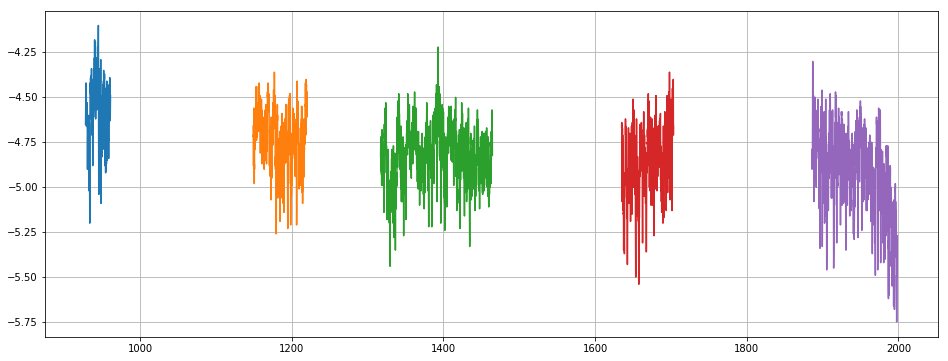

In [4]:
plt.figure(figsize=(16,6))
plt.plot(s5_yy, s5_data_kobb_2003)
plt.plot(s4_yy, s4_data_kobb_2003)
plt.plot(s3_yy, s3_data_kobb_2003)
plt.plot(s2_yy, s2_data_kobb_2003)
plt.plot(s1_yy, s1_data_kobb_2003)
plt.grid()

In [5]:
# Deseason the 5 series
win = 12
s1_yy_ = s1_yy[int(win/2):s1_yy.shape[0]-int(win/2)]
s1_data_kobb_2003_ = np.zeros((s1_data_kobb_2003.shape[0] - win))

s2_yy_ = s2_yy[int(win/2):s2_yy.shape[0]-int(win/2)]
s2_data_kobb_2003_ = np.zeros((s2_data_kobb_2003.shape[0] - win))

s3_yy_ = s3_yy[int(win/2):s3_yy.shape[0]-int(win/2)]
s3_data_kobb_2003_ = np.zeros((s3_data_kobb_2003.shape[0] - win))

s4_yy_ = s4_yy[int(win/2):s4_yy.shape[0]-int(win/2)]
s4_data_kobb_2003_ = np.zeros((s4_data_kobb_2003.shape[0] - win))

s5_yy_ = s5_yy[int(win/2):s5_yy.shape[0]-int(win/2)]
s5_data_kobb_2003_ = np.zeros((s5_data_kobb_2003.shape[0] - win))
clim = 30
for i in range(s1_yy_.shape[0]):
        s1_data_kobb_2003_[i] = s1_data_kobb_2003[i+int(win/2)] - np.mean(s1_data_kobb_2003[i:s1_yy_.shape[0]:12])
for i in range(s2_yy_.shape[0]):
    s2_data_kobb_2003_[i] = s2_data_kobb_2003[i+int(win/2)] - np.mean(s2_data_kobb_2003[i:s1_yy_.shape[0]:12])
for i in range(s3_yy_.shape[0]):
    s3_data_kobb_2003_[i] = s3_data_kobb_2003[i+int(win/2)] - np.mean(s3_data_kobb_2003[i:s1_yy_.shape[0]:12])
for i in range(s4_yy_.shape[0]):
    s4_data_kobb_2003_[i] = s4_data_kobb_2003[i+int(win/2)] - np.mean(s4_data_kobb_2003[i:s1_yy_.shape[0]:12])
for i in range(s5_yy_.shape[0]):
    s5_data_kobb_2003_[i] = s5_data_kobb_2003[i+int(win/2)] - np.mean(s5_data_kobb_2003[i:s1_yy_.shape[0]:12])
print(s1_yy_.shape)

(1336,)


/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


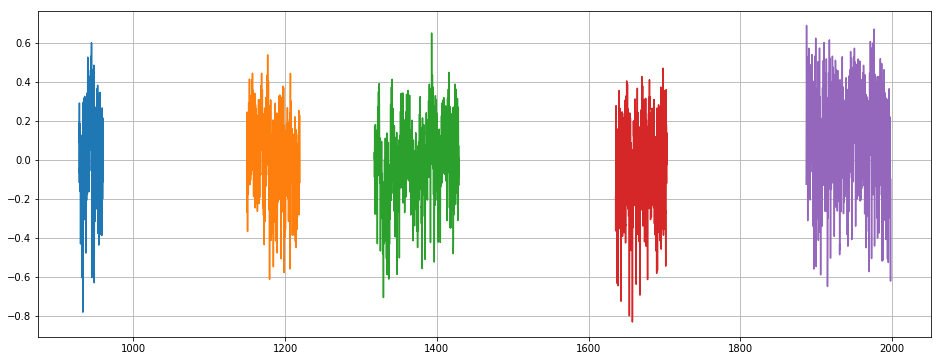

In [6]:
plt.figure(figsize=(16,6))
plt.plot(s5_yy_, s5_data_kobb_2003_)
plt.plot(s4_yy_, s4_data_kobb_2003_)
plt.plot(s3_yy_, s3_data_kobb_2003_)
plt.plot(s2_yy_, s2_data_kobb_2003_)
plt.plot(s1_yy_, s1_data_kobb_2003_)
plt.grid()

In [7]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [8]:
fs = 1 # 120 data points collected per 10 years
lowcut = 1/84
highcut = 1/24
s1_filt = butter_bandpass_filter(s1_data_kobb_2003_, lowcut, highcut, fs, order=4)
s2_filt = butter_bandpass_filter(s2_data_kobb_2003_, lowcut, highcut, fs, order=4)
s3_filt = butter_bandpass_filter(s3_data_kobb_2003_, lowcut, highcut, fs, order=4)
s4_filt = butter_bandpass_filter(s4_data_kobb_2003_, lowcut, highcut, fs, order=4)
s5_filt = butter_bandpass_filter(s5_data_kobb_2003_, lowcut, highcut, fs, order=4)

# Scale up to original signal values
# An El Niño (La Niña) event is defined by annual-mean δ18O anomalies (computed from the 2–7-yr bandpass filter series, 
# centred on January) that are less than (greater than) -0.11‰ (+ 0.11‰).
#s1_filt = (s1_filt/np.max(np.abs(s1_filt)))*np.max(np.abs(s1_data_kobb_2003_))
#s2_filt = (s2_filt/np.max(np.abs(s2_filt)))*np.max(np.abs(s2_data_kobb_2003_))
#s3_filt = (s3_filt/np.max(np.abs(s3_filt)))*np.max(np.abs(s3_data_kobb_2003_))
#s4_filt = (s4_filt/np.max(np.abs(s4_filt)))*np.max(np.abs(s4_data_kobb_2003_))
#s5_filt = (s5_filt/np.max(np.abs(s5_filt)))*np.max(np.abs(s5_data_kobb_2003_))

#s1_filt = s1_filt/(np.std(s1_filt))
#s2_filt = (s2_filt/np.max(np.abs(s2_filt)))*np.max(np.abs(s2_data_kobb_2003_))
#s3_filt = (s3_filt/np.max(np.abs(s3_filt)))*np.max(np.abs(s3_data_kobb_2003_))
#s4_filt = (s4_filt/np.max(np.abs(s4_filt)))*np.max(np.abs(s4_data_kobb_2003_))
#s5_filt = (s5_filt/np.max(np.abs(s5_filt)))*np.max(np.abs(s5_data_kobb_2003_))


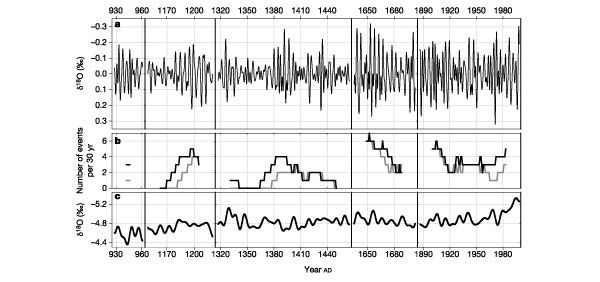
An El Niño (La Niña) event is defined by annual-mean δ18O anomalies (computed from the 2–7-yr bandpass filter series, centred on January) that are less than (greater than) -0.11‰ (+ 0.11‰).

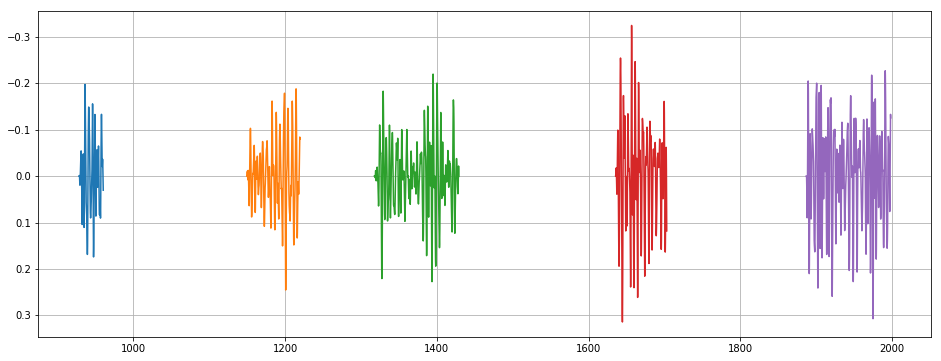

In [9]:
plt.figure(figsize=(16,6))
plt.plot(s5_yy_, s5_filt)
plt.plot(s4_yy_, s4_filt)
plt.plot(s3_yy_, s3_filt)
plt.plot(s2_yy_, s2_filt)
plt.plot(s1_yy_, s1_filt)
plt.gca().invert_yaxis()
plt.grid()

In [10]:
s1_en = np.zeros((s1_filt.shape[0]))
s2_en = np.zeros((s2_filt.shape[0]))
s3_en = np.zeros((s3_filt.shape[0]))
s4_en = np.zeros((s4_filt.shape[0]))
s5_en = np.zeros((s5_filt.shape[0]))

s1_ln = np.zeros((s1_filt.shape[0]))
s2_ln = np.zeros((s2_filt.shape[0]))
s3_ln = np.zeros((s3_filt.shape[0]))
s4_ln = np.zeros((s4_filt.shape[0]))
s5_ln = np.zeros((s5_filt.shape[0]))

In [11]:
s1_en[s1_filt<-0.11] = 1.0
s2_en[s2_filt<-0.11] = 1.0
s3_en[s3_filt<-0.11] = 1.0
s4_en[s4_filt<-0.11] = 1.0
s5_en[s5_filt<-0.11] = 1.0

s1_ln[s1_filt>0.11] = 1.0
s2_ln[s2_filt>0.11] = 1.0
s3_ln[s3_filt>0.11] = 1.0
s4_ln[s4_filt>0.11] = 1.0
s5_ln[s5_filt>0.11] = 1.0

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [12]:
s1_start_year = np.round(s1_yy[0])
s1_end_year = np.round(s1_yy[-1])

s2_start_year = np.round(s2_yy[0])
s2_end_year = np.round(s2_yy[-1])

s3_start_year = np.round(s3_yy[0])
s3_end_year = np.round(s3_yy[-1])

s4_start_year = np.round(s4_yy[0])
s4_end_year = np.round(s4_yy[-1])

s5_start_year = np.round(s5_yy[0])
s5_end_year = np.round(s5_yy[-1])

s1_en_yy = np.arange(int(s1_start_year),int(s1_end_year)+1)
s2_en_yy = np.arange(int(s2_start_year),int(s2_end_year)+1)
s3_en_yy = np.arange(int(s3_start_year),int(s3_end_year)+1)
s4_en_yy = np.arange(int(s4_start_year),int(s4_end_year)+1)
s5_en_yy = np.arange(int(s5_start_year),int(s5_end_year)+1)

s1_en_yy_s1 = np.zeros((s1_en_yy.shape[0]))
s2_en_yy_s2 = np.zeros((s2_en_yy.shape[0]))
s3_en_yy_s3 = np.zeros((s3_en_yy.shape[0]))
s4_en_yy_s4 = np.zeros((s4_en_yy.shape[0]))
s5_en_yy_s5 = np.zeros((s5_en_yy.shape[0]))

In [13]:
for i in range(s1_en_yy.shape[0]):
    s_dummy = []
    for j in range(s1_yy_.shape[0]):
        if (s1_en_yy[i]==np.trunc(s1_yy_[j])):
            s_dummy.append(s1_filt[j])
    s_dummy_ = np.asarray(s_dummy)
    s_dummy_en_idx = s_dummy_<-0.11
    if(np.sum(s_dummy_en_idx)>=4):
        s1_en_yy_s1[i] = 1.0
        
for i in range(s2_en_yy.shape[0]):
    s_dummy = []
    for j in range(s2_yy_.shape[0]):
        if (s2_en_yy[i]==np.trunc(s2_yy_[j])):
            s_dummy.append(s2_filt[j])
    s_dummy_ = np.asarray(s_dummy)
    s_dummy_en_idx = s_dummy_<-0.11
    if(np.sum(s_dummy_en_idx)>=4):
        s2_en_yy_s2[i] = 1.0
        
for i in range(s3_en_yy.shape[0]):
    s_dummy = []
    for j in range(s3_yy_.shape[0]):
        if (s3_en_yy[i]==np.trunc(s3_yy_[j])):
            s_dummy.append(s3_filt[j])
    s_dummy_ = np.asarray(s_dummy)
    s_dummy_en_idx = s_dummy_<-0.11
    if(np.sum(s_dummy_en_idx)>=4):
        s3_en_yy_s3[i] = 1.0
        
for i in range(s4_en_yy.shape[0]):
    s_dummy = []
    for j in range(s4_yy_.shape[0]):
        if (s4_en_yy[i]==np.trunc(s4_yy_[j])):
            s_dummy.append(s4_filt[j])
    s_dummy_ = np.asarray(s_dummy)
    s_dummy_en_idx = s_dummy_<-0.11
    if(np.sum(s_dummy_en_idx)>=4):
        s4_en_yy_s4[i] = 1.0
        
for i in range(s5_en_yy.shape[0]):
    s_dummy = []
    for j in range(s5_yy_.shape[0]):
        if (s5_en_yy[i]==np.trunc(s5_yy_[j])):
            s_dummy.append(s5_filt[j])
    s_dummy_ = np.asarray(s_dummy)
    s_dummy_en_idx = s_dummy_<-0.11
    if(np.sum(s_dummy_en_idx)>=4):
        s5_en_yy_s5[i] = 1.0

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less


In [31]:
event_en_kobb = np.concatenate((s5_en_yy_s5, s4_en_yy_s4, s3_en_yy_s3, s2_en_yy_s2, s1_en_yy_s1))
event_yy_kobb = np.concatenate((s5_en_yy, s4_en_yy, s3_en_yy, s2_en_yy, s1_en_yy))

s1_filt_norm = (s1_filt - np.mean(s1_filt))/(np.std(s1_filt))
s2_filt_norm = (s2_filt - np.mean(s2_filt))/(np.std(s2_filt))
s3_filt_norm = (s3_filt - np.mean(s3_filt))/(np.std(s3_filt))
s4_filt_norm = (s4_filt - np.mean(s4_filt))/(np.std(s4_filt))
s5_filt_norm = (s5_filt - np.mean(s5_filt))/(np.std(s5_filt))

s = np.concatenate((s5_filt_norm, s4_filt_norm, s3_filt_norm, s2_filt_norm, s1_filt_norm))
y = np.concatenate((s5_yy_, s4_yy_, s3_yy_, s2_yy_, s1_yy_,))

In [30]:
event_yy_volc_all = np.zeros((event_yy_kobb.shape[0]))
event_yy_volc_strong = np.zeros((event_yy_kobb.shape[0]))
event_yy_volc_all_trop = np.zeros((event_yy_kobb.shape[0]))
event_yy_volc_all_nh = np.zeros((event_yy_kobb.shape[0]))
event_yy_volc_all_sh = np.zeros((event_yy_kobb.shape[0]))
event_yy_volc_strong_trop = np.zeros((event_yy_kobb.shape[0]))
event_yy_volc_strong_nh = np.zeros((event_yy_kobb.shape[0]))
event_yy_volc_strong_sh = np.zeros((event_yy_kobb.shape[0]))



for i in range(event_yy_kobb.shape[0]):
    #print(event_yy_kobb[i])
    idx = np.asarray(np.where(volc[:,0] == event_yy_kobb[i]))
    #print(idx.size)
    if idx.size==0:
        continue
    event_yy_volc_all[i] = 1.0
    if np.abs(volc[idx[0,0],2])>=1.0:
        event_yy_volc_strong[i] = 1.0
    
    if volc[idx[0,0],1] == 1.0:
        event_yy_volc_all_trop[i] = 1.0
    if volc[idx[0,0],1] == 2.0:
        event_yy_volc_all_nh[i] = 1.0
    if volc[idx[0,0],1] == 3.0:
        event_yy_volc_all_sh[i] = 1.0
        
    if (volc[idx[0,0],1] == 1.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_trop[i] = 1.0
    if (volc[idx[0,0],1] == 2.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_nh[i] = 1.0
    if (volc[idx[0,0],1] == 3.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_sh[i] = 1.0

In [16]:
np.savetxt('el_nino_kobb_2003.txt', event_en_kobb, delimiter=",")
np.savetxt('all_volc_kobb_2003.txt', event_yy_volc_all, delimiter=",")
np.savetxt('strong_volc_kobb_2003.txt', event_yy_volc_strong, delimiter=",")
np.savetxt('all_tropical_kobb_2003.txt', event_yy_volc_all_trop, delimiter=",")
np.savetxt('strong_tropical_kobb_2003.txt', event_yy_volc_strong_trop, delimiter=",")
np.savetxt('all_nh_kobb_2003.txt', event_yy_volc_all_nh, delimiter=",")
np.savetxt('strong_nh_kobb_2003.txt', event_yy_volc_strong_nh, delimiter=",")
np.savetxt('all_sh_kobb_2003.txt', event_yy_volc_all_sh, delimiter=",")
np.savetxt('strong_sh_kobb_2003.txt', event_yy_volc_strong_sh, delimiter=",")

In [17]:
print(np.sum(event_yy_volc_all))
print(np.sum(event_yy_volc_strong))
print(np.sum(event_yy_volc_all_trop))
print(np.sum(event_yy_volc_strong_trop))
print(np.sum(event_yy_volc_all_nh))
print(np.sum(event_yy_volc_strong_nh))
print(np.sum(event_yy_volc_all_sh))
print(np.sum(event_yy_volc_strong_sh))

53.0
12.0
17.0
9.0
24.0
3.0
12.0
0.0


In [18]:
# Bootstrap
N = 1000
win = 5
count_elnino_all_volc = np.zeros((N, win))
count_elnino_strong_volc  = np.zeros((N, win))
count_elnino_all_trop  = np.zeros((N, win))
count_elnino_strong_trop  = np.zeros((N, win))
count_elnino_all_nh  = np.zeros((N, win))
count_elnino_strong_nh  = np.zeros((N, win))
count_elnino_all_sh  = np.zeros((N, win))

In [19]:
idx_all = np.asarray(np.where(event_yy_volc_all == 1.0))
idx_strong = np.asarray(np.where(event_yy_volc_strong == 1.0))
idx_all_trop = np.asarray(np.where(event_yy_volc_all_trop == 1.0))
idx_strong_trop = np.asarray(np.where(event_yy_volc_strong_trop == 1.0))
idx_all_nh = np.asarray(np.where(event_yy_volc_all_nh == 1.0))
idx_strong_nh = np.asarray(np.where(event_yy_volc_strong_nh == 1.0))
idx_all_sh = np.asarray(np.where(event_yy_volc_all_sh == 1.0))

In [20]:
print(idx_all[0])

[  1  11  18  25  30  32  56  65  67  76  85  95 118 125 130 134 167 170
 178 197 203 205 230 237 242 247 252 257 261 266 274 282 287 293 313 315
 325 328 341 346 350 357 363 364 369 381 385 395 402 406 417 420 429]


In [21]:
niter = 0
while niter<N:
    rand_year_all = random.sample(list(idx_all[0]), 1)
    count_elnino_all_volc[niter,:] = s[rand_year_all[0]:rand_year_all[0]+win]
    
    rand_year_strong = random.sample(list(idx_strong[0]), 1)
    count_elnino_strong_volc[niter,:] = s[rand_year_strong[0]:rand_year_strong[0]+win]
    
    rand_year_all_trop = random.sample(list(idx_all_trop[0]), 1)
    count_elnino_all_trop[niter,:] = s[rand_year_all_trop[0]:rand_year_all_trop[0]+win]

    rand_year_strong_trop = random.sample(list(idx_strong_trop[0]), 1)
    count_elnino_strong_trop[niter,:] = s[rand_year_strong_trop[0]:rand_year_strong_trop[0]+win]

    rand_year_all_nh = random.sample(list(idx_all_nh[0]), 1)
    count_elnino_all_nh[niter,:] = s[rand_year_all_nh[0]:rand_year_all_nh[0]+win]

    rand_year_strong_nh = random.sample(list(idx_strong_nh[0]), 1)
    count_elnino_strong_nh[niter,:] = s[rand_year_strong_nh[0]:rand_year_strong_nh[0]+win]

    rand_year_all_sh = random.sample(list(idx_all_sh[0]), 1)
    count_elnino_all_sh[niter,:] = s[rand_year_all_sh[0]:rand_year_all_sh[0]+win]
    
    #print(s[rand_year_all[0]:rand_year_all[0]+win])
    #print(rand_year_all[0])
    niter = niter + 1 

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


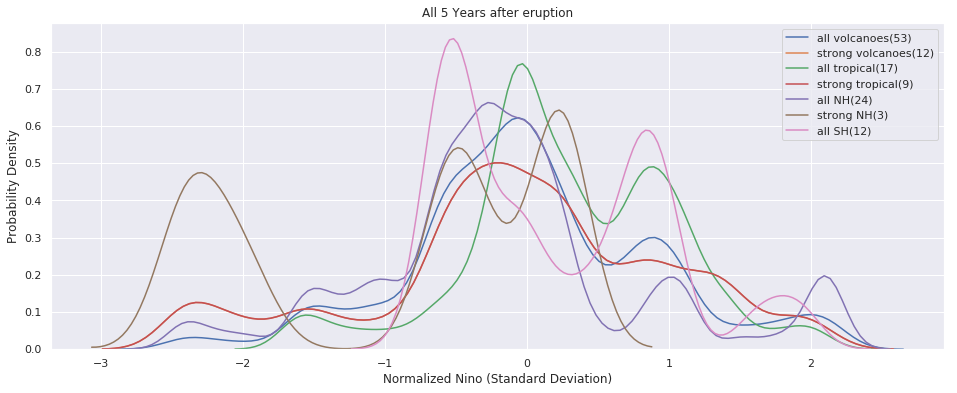

In [22]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc.flatten(), label='all volcanoes(53)')
sns.kdeplot(count_elnino_strong_volc.flatten(), label='strong volcanoes(12)')
sns.kdeplot(count_elnino_all_trop.flatten(), label='all tropical(17)')
sns.kdeplot(count_elnino_strong_volc.flatten(), label='strong tropical(9)')
sns.kdeplot(count_elnino_all_nh.flatten(), label='all NH(24)')
sns.kdeplot(count_elnino_strong_nh.flatten(), label='strong NH(3)')
sns.kdeplot(count_elnino_all_sh.flatten(), label='all SH(12)')
plt.title('All 5 Years after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized Nino (Standard Deviation)')
plt.legend()

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


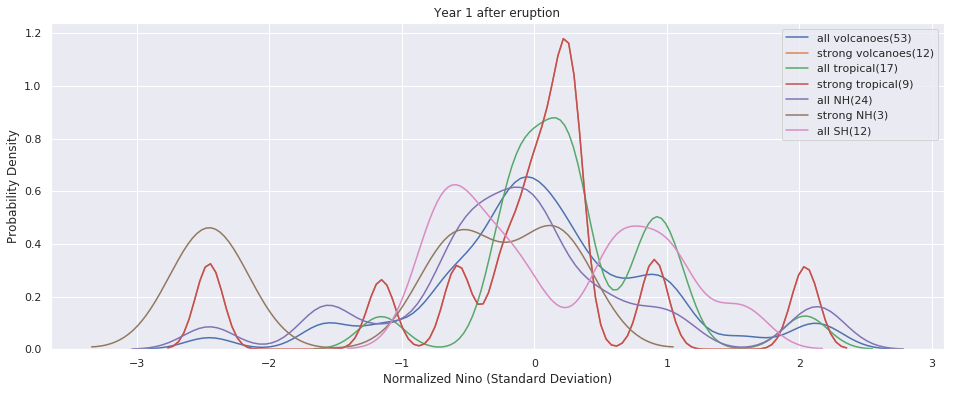

In [23]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc[:,0], label='all volcanoes(53)')
sns.kdeplot(count_elnino_strong_volc[:,0], label='strong volcanoes(12)')
sns.kdeplot(count_elnino_all_trop[:,0], label='all tropical(17)')
sns.kdeplot(count_elnino_strong_volc[:,0], label='strong tropical(9)')
sns.kdeplot(count_elnino_all_nh[:,0], label='all NH(24)')
sns.kdeplot(count_elnino_strong_nh[:,0], label='strong NH(3)')
sns.kdeplot(count_elnino_all_sh[:,0], label='all SH(12)')
plt.title('Year 1 after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized Nino (Standard Deviation)')
plt.legend()

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


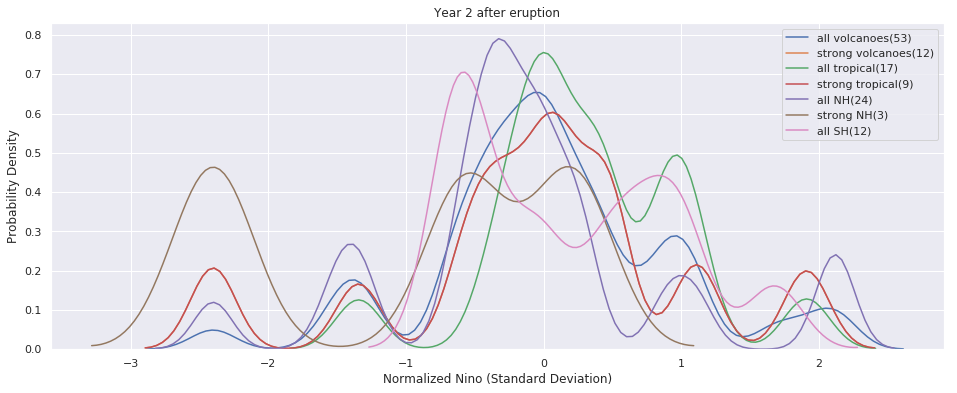

In [24]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc[:,1], label='all volcanoes(53)')
sns.kdeplot(count_elnino_strong_volc[:,1], label='strong volcanoes(12)')
sns.kdeplot(count_elnino_all_trop[:,1], label='all tropical(17)')
sns.kdeplot(count_elnino_strong_volc[:,1], label='strong tropical(9)')
sns.kdeplot(count_elnino_all_nh[:,1], label='all NH(24)')
sns.kdeplot(count_elnino_strong_nh[:,1], label='strong NH(3)')
sns.kdeplot(count_elnino_all_sh[:,1], label='all SH(12)')
plt.title('Year 2 after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized Nino (Standard Deviation)')
plt.legend()

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


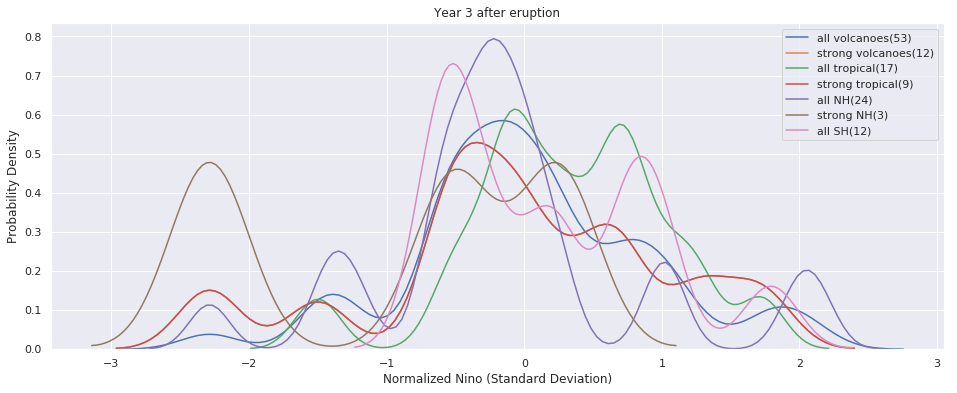

In [25]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc[:,2], label='all volcanoes(53)')
sns.kdeplot(count_elnino_strong_volc[:,2], label='strong volcanoes(12)')
sns.kdeplot(count_elnino_all_trop[:,2], label='all tropical(17)')
sns.kdeplot(count_elnino_strong_volc[:,2], label='strong tropical(9)')
sns.kdeplot(count_elnino_all_nh[:,2], label='all NH(24)')
sns.kdeplot(count_elnino_strong_nh[:,2], label='strong NH(3)')
sns.kdeplot(count_elnino_all_sh[:,2], label='all SH(12)')
plt.title('Year 3 after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized Nino (Standard Deviation)')
plt.legend()

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


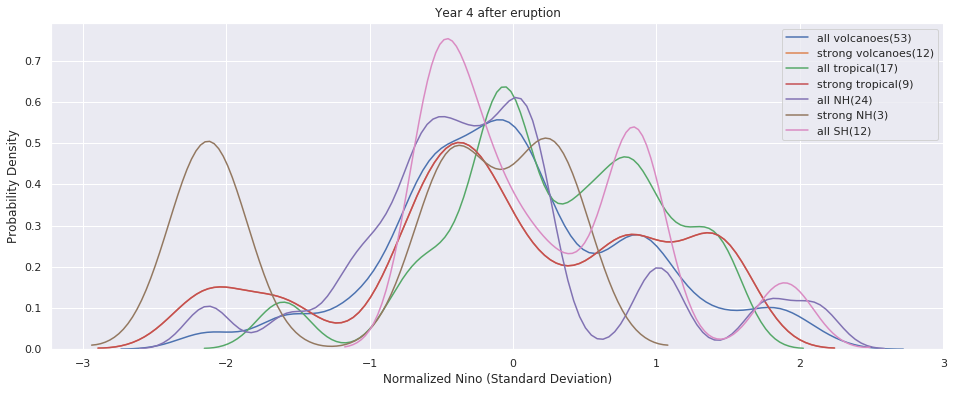

In [26]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc[:,3], label='all volcanoes(53)')
sns.kdeplot(count_elnino_strong_volc[:,3], label='strong volcanoes(12)')
sns.kdeplot(count_elnino_all_trop[:,3], label='all tropical(17)')
sns.kdeplot(count_elnino_strong_volc[:,3], label='strong tropical(9)')
sns.kdeplot(count_elnino_all_nh[:,3], label='all NH(24)')
sns.kdeplot(count_elnino_strong_nh[:,3], label='strong NH(3)')
sns.kdeplot(count_elnino_all_sh[:,3], label='all SH(12)')
plt.title('Year 4 after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized Nino (Standard Deviation)')
plt.legend()

In [27]:
# Bootstrap
N = 1000
win = 20
count_elnino_all_volc = np.zeros((N))
count_elnino_strong_volc  = np.zeros((N))
count_elnino_all_trop  = np.zeros((N))
count_elnino_strong_trop  = np.zeros((N))
count_elnino_all_nh  = np.zeros((N))
count_elnino_strong_nh  = np.zeros((N))
count_elnino_all_sh  = np.zeros((N))

In [28]:
niter = 0
while niter<N:
    rand_year_all = random.sample(list(idx_all[0]), 1)
    if (rand_year_all[0]<event_en_kobb.shape[0]-win):
        count_elnino_all_volc[niter] = np.sum(event_en_kobb[rand_year_all[0]:rand_year_all[0]+win])
    
    rand_year_strong = random.sample(list(idx_strong[0]), 1)
    if (rand_year_strong[0]<event_en_kobb.shape[0]-win):
        count_elnino_strong_volc[niter] = np.sum(event_en_kobb[rand_year_strong[0]:rand_year_strong[0]+win])
    
    rand_year_all_trop = random.sample(list(idx_all_trop[0]), 1)
    if (rand_year_all_trop[0]<event_en_kobb.shape[0]-win):
        count_elnino_all_trop[niter] = np.sum(event_en_kobb[rand_year_all_trop[0]:rand_year_all_trop[0]+win])

    rand_year_strong_trop = random.sample(list(idx_strong_trop[0]), 1)
    if (rand_year_strong_trop[0]<event_en_kobb.shape[0]-win):
        count_elnino_strong_trop[niter] = np.sum(event_en_kobb[rand_year_strong_trop[0]:rand_year_strong_trop[0]+win])

    rand_year_all_nh = random.sample(list(idx_all_nh[0]), 1)
    if (rand_year_all_nh[0]<event_en_kobb.shape[0]-win):
        count_elnino_all_nh[niter] = np.sum(event_en_kobb[rand_year_all_nh[0]:rand_year_all_nh[0]+win])

    rand_year_strong_nh = random.sample(list(idx_strong_nh[0]), 1)
    if (rand_year_strong_nh[0]<event_en_kobb.shape[0]-win):
        count_elnino_strong_nh[niter] = np.sum(event_en_kobb[rand_year_strong_nh[0]:rand_year_strong_nh[0]+win])

    rand_year_all_sh = random.sample(list(idx_all_sh[0]), 1)
    if (rand_year_all_sh[0]<event_en_kobb.shape[0]-win):
        count_elnino_all_sh[niter] = np.sum(event_en_kobb[rand_year_all_sh[0]:rand_year_all_sh[0]+win])
    
    #print(s[rand_year_all[0]:rand_year_all[0]+win])
    #print(rand_year_all[0])
    niter = niter + 1 

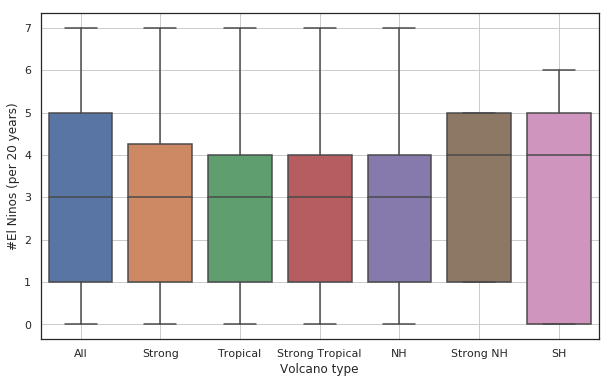

In [29]:
# ENSO has a 2-7 year cycle so El Nino can come every 4-5 years, hence 2 El Ninos per 10 years 
import pandas as pd 
import seaborn as sns
data1 = pd.DataFrame({ 'Volcano type' : np.repeat('All',N), '#El Ninos (per 20 years)': count_elnino_all_volc })
data2 = pd.DataFrame({ 'Volcano type' : np.repeat('Strong',N), '#El Ninos (per 20 years)': count_elnino_strong_volc })
data3 = pd.DataFrame({ 'Volcano type' : np.repeat('Tropical',N), '#El Ninos (per 20 years)': count_elnino_all_trop })
data4 = pd.DataFrame({ 'Volcano type' : np.repeat('Strong Tropical',N), '#El Ninos (per 20 years)': count_elnino_strong_trop })
data5 = pd.DataFrame({ 'Volcano type' : np.repeat('NH',N), '#El Ninos (per 20 years)': count_elnino_all_nh })
data6 = pd.DataFrame({ 'Volcano type' : np.repeat('Strong NH',N), '#El Ninos (per 20 years)': count_elnino_strong_nh })
data7 = pd.DataFrame({ 'Volcano type' : np.repeat('SH',N), '#El Ninos (per 20 years)': count_elnino_all_sh })
#data8 = pd.DataFrame({ 'Volcano type' : np.repeat('Strong SH',N), 'Count (per 10 years)': count_elnino_strong_sh })


df=data1.append(data2).append(data3).append(data4).append(data5).append(data6).append(data7)
plt.figure(figsize=(10,6))
sns.set_style(style='white')
sns.boxplot(x='Volcano type', y='#El Ninos (per 20 years)', data=df)
plt.grid()

In [34]:
nino3_cobb_anom_yy = np.zeros((s.shape[0],3))
nino3_cobb_anom_yy[:,0] = y[:]
nino3_cobb_anom_yy[:,1] = event_yy_volc_strong[:]
nino3_cobb_anom_yy[:,2] = -s[:]
np.savetxt('nino3_cobb_anom_yy.txt', nino3_cobb_anom_yy, delimiter=",")

ValueError: could not broadcast input array from shape (437) into shape (5128)

In [41]:
event_yy_volc_strong.shape

(437,)